In [3]:
import pandas as pd
import plotly.express as px

In [4]:
shipments_flowers = pd.read_csv('views/shipments_flowers.csv')
type_damage = pd.read_csv('views/flowers_type_damage.csv')
orders_flowers = pd.read_csv('views/orders_flowers.csv')

In [19]:
shipments_flowers.shipment_date = pd.to_datetime(shipments_flowers.shipment_date).dt.date
orders_flowers.order_date = pd.to_datetime(orders_flowers.order_date).dt.date

In [36]:
orders_flowers['total_cost'] = orders_flowers.quantity * orders_flowers.cost_cad

In [45]:
chart_1 = orders_flowers[['order_date', 'flower_name', 'quantity']].groupby(['order_date', 'flower_name']).sum().reset_index()

/home/nic0der/Documents/bloomstar/venv/lib64/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



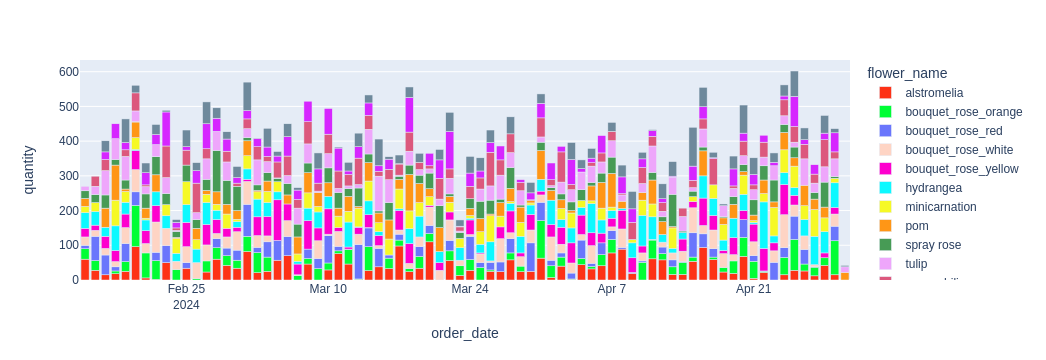

In [46]:
px.bar(chart_1, x='order_date', y='quantity', color='flower_name', color_discrete_sequence=px.colors.qualitative.Light24)

In [47]:
chart_2 = orders_flowers[['order_date', 'total_cost']].groupby(['order_date']).sum().reset_index()

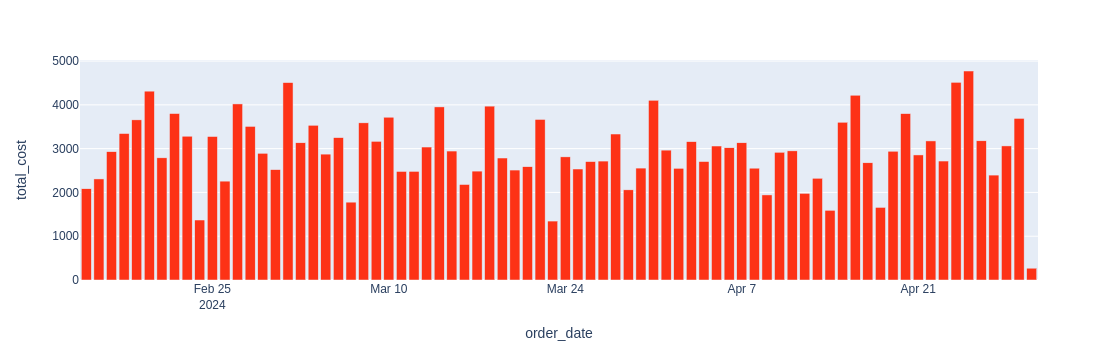

In [93]:
px.bar(chart_2, x='order_date', y='total_cost', color_discrete_sequence=px.colors.qualitative.Light24)

In [54]:
chart_3 = shipments_flowers[['shipment_date', 'flower_name', 'quantity']].groupby(['shipment_date', 'flower_name']).sum().reset_index()

/home/nic0der/Documents/bloomstar/venv/lib64/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



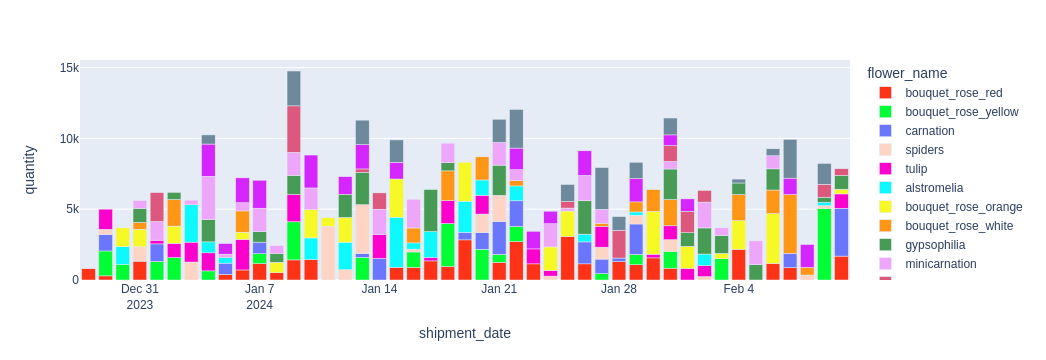

In [56]:
px.bar(chart_3, x='shipment_date', y='quantity', color='flower_name', color_discrete_sequence=px.colors.qualitative.Light24)

In [65]:
chart_4 = shipments_flowers[['shipment_date', 'inventory_gross_value', 'money_lost_damage']].groupby(['shipment_date']).sum().reset_index()

In [67]:
chart_4['not_lost_money'] = chart_4.inventory_gross_value - chart_4.money_lost_damage

In [83]:
side_a = chart_4.set_index('shipment_date')['money_lost_damage'].to_frame().rename(columns = {'money_lost_damage': 'money'}).reset_index()
side_a['money_status'] = 'lost'
side_b = chart_4.set_index('shipment_date')['not_lost_money'].to_frame().rename(columns = {'not_lost_money': 'money'}).reset_index()
side_b['money_status'] = 'not_lost'
refactory_chart_4 = [side_a, side_b]

In [85]:
chart_4a = pd.concat(refactory_chart_4)

/home/nic0der/Documents/bloomstar/venv/lib64/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



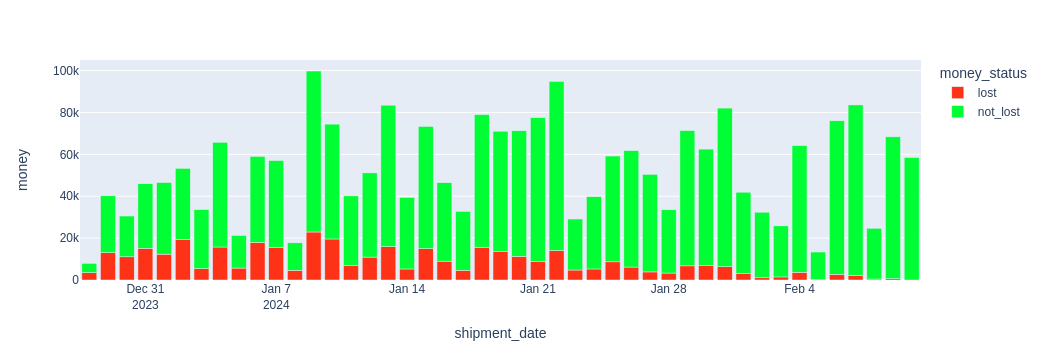

In [86]:
px.bar(chart_4a, x='shipment_date', y='money', color='money_status',color_discrete_sequence=px.colors.qualitative.Light24)

In [110]:
type_damage['quantity_damage'] = type_damage.quantity - type_damage.quantity_no_damage
side_a1 = type_damage.set_index('flower_name')['quantity_no_damage'].to_frame().rename(columns={'quantity_no_damage':'quantity'}).reset_index()
side_a1['flower_status'] = 'not_lost'
side_b1 = type_damage.set_index('flower_name')['quantity_damage'].to_frame().rename(columns={'quantity_damage':'quantity'}).reset_index()
side_b1['flower_status'] = 'lost'
refactory_chart_5 = [side_b1, side_a1]

In [111]:
chart_5 = pd.concat(refactory_chart_5)

/home/nic0der/Documents/bloomstar/venv/lib64/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



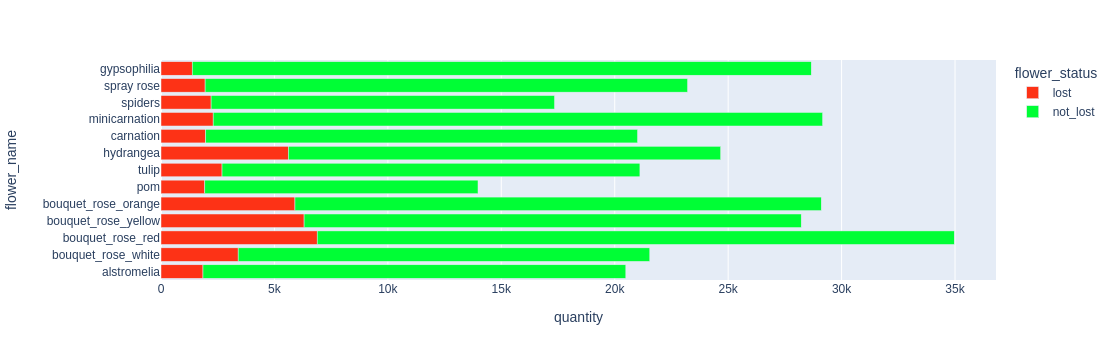

In [113]:
px.bar(chart_5, x='quantity', y='flower_name', color='flower_status',color_discrete_sequence=px.colors.qualitative.Light24)

In [119]:
shipments_flowers.money_lost_damage.sum()

380564.31166666665